• age: A numeric feature representing the age of the census respondent.
• workclass: A string feature representing the type of employment of the census respondent.
• fnlwgt: A numeric feature representing the weighting of this record from the census sample when applied to the total population.
• education: A string feature representing the highest level of education attained by the census respondent.
• education-num: A numeric feature representing the highest level of education attained by the census respondent.
• marital-status: A string feature indicating the marital status of the census respondent.
• occupation: A string feature representing the occupation of the census respondent.
• relationship: A categorical feature indicating the family relationship role of the census respondent.
• race: A string feature indicating the ethnicity of the census respondent.
• sex: A categorical feature indicating the gender of the census respondent.
• capital-gain: A numeric feature indicating the capital gains realized by the census respondent.
• capital-loss: A numeric feature indicating the capital losses incurred by the census respondent.
• hours-per-week: A numeric feature indicating the number of hours worked per week by the census respondent.
• native-country: A string feature indicating the nationality of the census respondent.
• income: A label indicating whether the census respondent earns 50,000 or less, or more than 50,000.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

import xgboost as xgb
from xgboost import XGBClassifier, XGBRegressor
from xgboost import to_graphviz

%matplotlib inline

from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.metrics import confusion_matrix, classification_report, mean_absolute_error, mean_squared_error
from sklearn.metrics import plot_confusion_matrix, plot_precision_recall_curve, plot_roc_curve

pd.options.display.max_columns= None

In [2]:
df = pd.read_csv("income.csv")

In [3]:
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32560,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32562 entries, 0 to 32561
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32562 non-null  int64 
 1   workclass       30726 non-null  object
 2   fnlwgt          32562 non-null  int64 
 3   education       32562 non-null  object
 4   education-num   32562 non-null  int64 
 5   marital-status  32562 non-null  object
 6   occupation      30719 non-null  object
 7   relationship    32562 non-null  object
 8   race            32562 non-null  object
 9   sex             32562 non-null  object
 10  capital-gain    32562 non-null  int64 
 11  capital-loss    32562 non-null  int64 
 12  hours-per-week  32562 non-null  int64 
 13  native-country  31979 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [5]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32562.000000,3.256200e+04,32562.000000,32562.000000,32562.000000,32562.000000
mean,38.581660,1.897749e+05,10.080769,1077.683312,87.301149,40.437442
std,13.640223,1.055502e+05,2.572732,7385.181296,402.954321,12.347239
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178188e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370492e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [6]:
df.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
income               1
dtype: int64

In [7]:
df.duplicated().sum()

24

In [8]:
df.shape

(32562, 15)

In [9]:
df2 = df.drop(['workclass','education','occupation','capital-gain','capital-loss','native-country'],axis=1)

In [10]:
df2

,age,fnlwgt,education-num,marital-status,relationship,race,sex,hours-per-week,income
0,39,77516,13,Never-married,Not-in-family,White,Male,40,<=50K
1,50,83311,13,Married-civ-spouse,Husband,White,Male,13,<=50K
2,38,215646,9,Divorced,Not-in-family,White,Male,40,<=50K
3,53,234721,7,Married-civ-spouse,Husband,Black,Male,40,<=50K
4,28,338409,13,Married-civ-spouse,Wife,Black,Female,40,<=50K
...,...,...,...,...,...,...,...,...,...
32557,40,154374,9,Married-civ-spouse,Husband,White,Male,40,>50K
32558,58,151910,9,Widowed,Unmarried,White,Female,40,<=50K
32559,22,201490,9,Never-married,Own-child,White,Male,20,<=50K
32560,52,287927,9,Married-civ-spouse,Wife,White,Female,40,>50K


In [11]:
df2['marital-status'].value_counts()

Married-civ-spouse       14976
Never-married            10684
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: marital-status, dtype: int64

In [12]:
df2['relationship'].value_counts()

Husband           13193
Not-in-family      8306
Own-child          5068
Unmarried          3446
Wife               1568
Other-relative      981
Name: relationship, dtype: int64

In [13]:
df2['race'].value_counts()

White                 27817
Black                  3124
Asian-Pac-Islander     1039
Amer-Indian-Eskimo      311
Other                   271
Name: race, dtype: int64

In [14]:
df2['sex'].value_counts()

Male      21791
Female    10771
Name: sex, dtype: int64

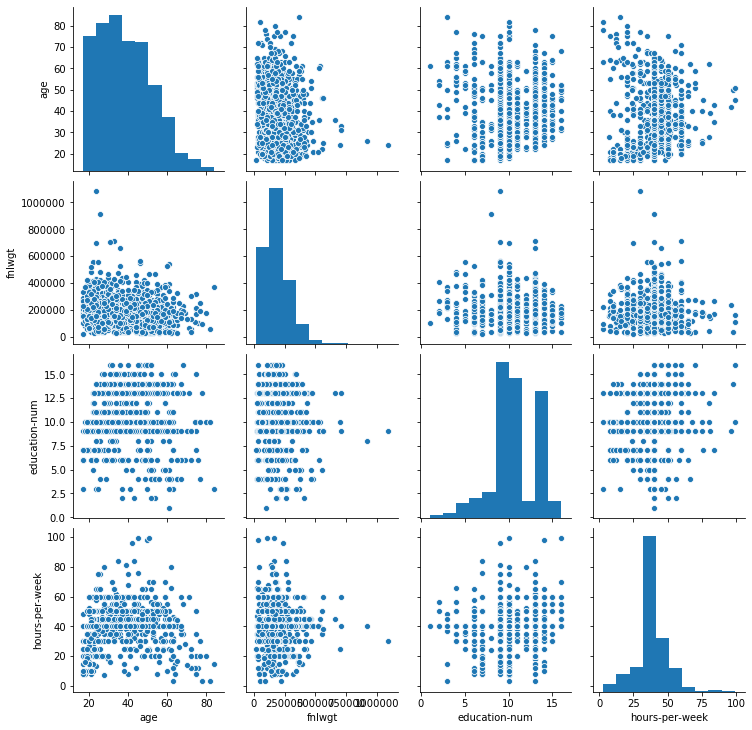

In [15]:
sns.pairplot(df2.sample(1000))
plt.show()

In [16]:
df2

,age,fnlwgt,education-num,marital-status,relationship,race,sex,hours-per-week,income
0,39,77516,13,Never-married,Not-in-family,White,Male,40,<=50K
1,50,83311,13,Married-civ-spouse,Husband,White,Male,13,<=50K
2,38,215646,9,Divorced,Not-in-family,White,Male,40,<=50K
3,53,234721,7,Married-civ-spouse,Husband,Black,Male,40,<=50K
4,28,338409,13,Married-civ-spouse,Wife,Black,Female,40,<=50K
...,...,...,...,...,...,...,...,...,...
32557,40,154374,9,Married-civ-spouse,Husband,White,Male,40,>50K
32558,58,151910,9,Widowed,Unmarried,White,Female,40,<=50K
32559,22,201490,9,Never-married,Own-child,White,Male,20,<=50K
32560,52,287927,9,Married-civ-spouse,Wife,White,Female,40,>50K


In [17]:
df2_num = df2[['age','fnlwgt','education-num','hours-per-week']]

In [18]:
df2_num

,age,fnlwgt,education-num,hours-per-week
0,39,77516,13,40
1,50,83311,13,13
2,38,215646,9,40
3,53,234721,7,40
4,28,338409,13,40
...,...,...,...,...
32557,40,154374,9,40
32558,58,151910,9,40
32559,22,201490,9,20
32560,52,287927,9,40


In [19]:
minmax = MinMaxScaler()

In [20]:
df2_num = minmax.fit_transform(df2_num)

In [21]:
df2_num

array([[0.30136986, 0.0443019 , 0.8       , 0.39795918],
       [0.45205479, 0.0482376 , 0.8       , 0.12244898],
       [0.28767123, 0.13811345, 0.53333333, 0.39795918],
       ...,
       [0.06849315, 0.12849934, 0.53333333, 0.19387755],
       [0.47945205, 0.18720338, 0.53333333, 0.39795918],
       [0.30136986, 0.04429103, 0.8       , 0.39795918]])

In [22]:
df2_num = pd.DataFrame(df2_num,columns=['age','fnlwgt','education-num','hours-per-week'])

In [23]:
df2_num

,age,fnlwgt,education-num,hours-per-week
0,0.301370,0.044302,0.800000,0.397959
1,0.452055,0.048238,0.800000,0.122449
2,0.287671,0.138113,0.533333,0.397959
3,0.493151,0.151068,0.400000,0.397959
4,0.150685,0.221488,0.800000,0.397959
...,...,...,...,...
32557,0.315068,0.096500,0.533333,0.397959
32558,0.561644,0.094827,0.533333,0.397959
32559,0.068493,0.128499,0.533333,0.193878
32560,0.479452,0.187203,0.533333,0.397959


In [24]:
df2_cat = df2[['marital-status','relationship','race','sex']]

In [25]:
df2_cat

,marital-status,relationship,race,sex
0,Never-married,Not-in-family,White,Male
1,Married-civ-spouse,Husband,White,Male
2,Divorced,Not-in-family,White,Male
3,Married-civ-spouse,Husband,Black,Male
4,Married-civ-spouse,Wife,Black,Female
...,...,...,...,...
32557,Married-civ-spouse,Husband,White,Male
32558,Widowed,Unmarried,White,Female
32559,Never-married,Own-child,White,Male
32560,Married-civ-spouse,Wife,White,Female


In [26]:
df2_cat = pd.get_dummies(df2_cat, drop_first=True)

In [27]:
df2_cat

,marital-status_Married-AF-spouse,marital-status_Married-civ-spouse,marital-status_Married-spouse-absent,marital-status_Never-married,marital-status_Separated,marital-status_Widowed,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Male
0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1
1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1
2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1
3,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
4,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32557,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1
32558,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0
32559,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,1
32560,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0


In [28]:
label = df2['income']

In [29]:
label

0        <=50K
1        <=50K
2        <=50K
3        <=50K
4        <=50K
         ...  
32557     >50K
32558    <=50K
32559    <=50K
32560     >50K
32561      NaN
Name: income, Length: 32562, dtype: object

In [30]:
df3 = pd.concat([df2_num,df2_cat,label],axis=1)

In [31]:
df3

,age,fnlwgt,education-num,hours-per-week,marital-status_Married-AF-spouse,marital-status_Married-civ-spouse,marital-status_Married-spouse-absent,marital-status_Never-married,marital-status_Separated,marital-status_Widowed,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Male,income
0,0.301370,0.044302,0.800000,0.397959,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1,<=50K
1,0.452055,0.048238,0.800000,0.122449,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,<=50K
2,0.287671,0.138113,0.533333,0.397959,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,<=50K
3,0.493151,0.151068,0.400000,0.397959,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,<=50K
4,0.150685,0.221488,0.800000,0.397959,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32557,0.315068,0.096500,0.533333,0.397959,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,>50K
32558,0.561644,0.094827,0.533333,0.397959,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,<=50K
32559,0.068493,0.128499,0.533333,0.193878,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,1,<=50K
32560,0.479452,0.187203,0.533333,0.397959,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,>50K


In [32]:
df3.describe()

,age,fnlwgt,education-num,hours-per-week,marital-status_Married-AF-spouse,marital-status_Married-civ-spouse,marital-status_Married-spouse-absent,marital-status_Never-married,marital-status_Separated,marital-status_Widowed,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Male
count,32562.000000,32562.000000,32562.000000,32562.000000,32562.000000,32562.000000,32562.000000,32562.000000,32562.000000,32562.000000,32562.000000,32562.000000,32562.000000,32562.000000,32562.000000,32562.000000,32562.000000,32562.000000,32562.000000,32562.000000
mean,0.295639,0.120543,0.605385,0.402423,0.000706,0.459923,0.012837,0.328113,0.031478,0.030496,0.255083,0.030127,0.155642,0.105829,0.048154,0.031908,0.095940,0.008323,0.854278,0.669216
std,0.186852,0.071685,0.171515,0.125992,0.026568,0.498399,0.112573,0.469533,0.174609,0.171949,0.435914,0.170940,0.362521,0.307623,0.214095,0.175759,0.294514,0.090849,0.352833,0.470503
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.150685,0.071674,0.533333,0.397959,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,0.273973,0.112788,0.600000,0.397959,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
75%,0.424658,0.152650,0.733333,0.448980,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [33]:
df3.isnull().sum()

age                                     0
fnlwgt                                  0
education-num                           0
hours-per-week                          0
marital-status_Married-AF-spouse        0
marital-status_Married-civ-spouse       0
marital-status_Married-spouse-absent    0
marital-status_Never-married            0
marital-status_Separated                0
marital-status_Widowed                  0
relationship_Not-in-family              0
relationship_Other-relative             0
relationship_Own-child                  0
relationship_Unmarried                  0
relationship_Wife                       0
race_Asian-Pac-Islander                 0
race_Black                              0
race_Other                              0
race_White                              0
sex_Male                                0
income                                  1
dtype: int64

In [34]:
traindf = df3[0:32561]

In [35]:
traindf

,age,fnlwgt,education-num,hours-per-week,marital-status_Married-AF-spouse,marital-status_Married-civ-spouse,marital-status_Married-spouse-absent,marital-status_Never-married,marital-status_Separated,marital-status_Widowed,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Male,income
0,0.301370,0.044302,0.800000,0.397959,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1,<=50K
1,0.452055,0.048238,0.800000,0.122449,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,<=50K
2,0.287671,0.138113,0.533333,0.397959,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,<=50K
3,0.493151,0.151068,0.400000,0.397959,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,<=50K
4,0.150685,0.221488,0.800000,0.397959,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,0.136986,0.166404,0.733333,0.377551,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,<=50K
32557,0.315068,0.096500,0.533333,0.397959,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,>50K
32558,0.561644,0.094827,0.533333,0.397959,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,<=50K
32559,0.068493,0.128499,0.533333,0.193878,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,1,<=50K


In [36]:
encoder = LabelEncoder()

In [37]:
traindf['income'] = encoder.fit_transform(traindf['income'])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [38]:
# 0 for less than 50k, 1 for more than 50k
traindf

,age,fnlwgt,education-num,hours-per-week,marital-status_Married-AF-spouse,marital-status_Married-civ-spouse,marital-status_Married-spouse-absent,marital-status_Never-married,marital-status_Separated,marital-status_Widowed,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Male,income
0,0.301370,0.044302,0.800000,0.397959,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1,0
1,0.452055,0.048238,0.800000,0.122449,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
2,0.287671,0.138113,0.533333,0.397959,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0
3,0.493151,0.151068,0.400000,0.397959,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
4,0.150685,0.221488,0.800000,0.397959,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,0.136986,0.166404,0.733333,0.377551,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
32557,0.315068,0.096500,0.533333,0.397959,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1
32558,0.561644,0.094827,0.533333,0.397959,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0
32559,0.068493,0.128499,0.533333,0.193878,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0


In [39]:
#Save to csv
#traindf.to_csv("incomemod.csv",index=False)

In [40]:
#Create test dataset
testdf = df3[32561:]

In [41]:
testdf

,age,fnlwgt,education-num,hours-per-week,marital-status_Married-AF-spouse,marital-status_Married-civ-spouse,marital-status_Married-spouse-absent,marital-status_Never-married,marital-status_Separated,marital-status_Widowed,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Male,income
32561,0.30137,0.044291,0.8,0.397959,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1,NaN


In [42]:
testdf = testdf.drop(columns=['income'],axis=1)

In [43]:
testdf

,age,fnlwgt,education-num,hours-per-week,marital-status_Married-AF-spouse,marital-status_Married-civ-spouse,marital-status_Married-spouse-absent,marital-status_Never-married,marital-status_Separated,marital-status_Widowed,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Male
32561,0.30137,0.044291,0.8,0.397959,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1


In [44]:
#Save to csv
testdf.to_csv("incometest.csv",index=False)

### Model Training

In [45]:
traindf

,age,fnlwgt,education-num,hours-per-week,marital-status_Married-AF-spouse,marital-status_Married-civ-spouse,marital-status_Married-spouse-absent,marital-status_Never-married,marital-status_Separated,marital-status_Widowed,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Male,income
0,0.301370,0.044302,0.800000,0.397959,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1,0
1,0.452055,0.048238,0.800000,0.122449,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
2,0.287671,0.138113,0.533333,0.397959,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0
3,0.493151,0.151068,0.400000,0.397959,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
4,0.150685,0.221488,0.800000,0.397959,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,0.136986,0.166404,0.733333,0.377551,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
32557,0.315068,0.096500,0.533333,0.397959,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1
32558,0.561644,0.094827,0.533333,0.397959,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0
32559,0.068493,0.128499,0.533333,0.193878,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0


In [46]:
traindf.shape

(32561, 21)

In [47]:
X = traindf.iloc[:,0:20]
y = traindf.iloc[:,20]

In [48]:
X.values, y.values

(array([[0.30136986, 0.0443019 , 0.8       , ..., 0.        , 1.        ,
         1.        ],
        [0.45205479, 0.0482376 , 0.8       , ..., 0.        , 1.        ,
         1.        ],
        [0.28767123, 0.13811345, 0.53333333, ..., 0.        , 1.        ,
         1.        ],
        ...,
        [0.56164384, 0.09482688, 0.53333333, ..., 0.        , 1.        ,
         0.        ],
        [0.06849315, 0.12849934, 0.53333333, ..., 0.        , 1.        ,
         1.        ],
        [0.47945205, 0.18720338, 0.53333333, ..., 0.        , 1.        ,
         0.        ]]),
 array([0, 0, 0, ..., 0, 0, 1]))

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=123)

In [50]:
X_train.shape, X_test.shape

((19536, 20), (13025, 20))

In [51]:
xgb = XGBClassifier(random_state=123, n_estimators=200)

In [52]:
xgb.fit(X_train,y_train,eval_set=[(X_test,y_test)],eval_metric='error',early_stopping_rounds=20)

[0]	validation_0-error:0.182879
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.182879
[2]	validation_0-error:0.182495
[3]	validation_0-error:0.182879
[4]	validation_0-error:0.182649
[5]	validation_0-error:0.182649
[6]	validation_0-error:0.182649
[7]	validation_0-error:0.181113
[8]	validation_0-error:0.181344
[9]	validation_0-error:0.181036
[10]	validation_0-error:0.181267
[11]	validation_0-error:0.18142
[12]	validation_0-error:0.181267
[13]	validation_0-error:0.181267
[14]	validation_0-error:0.181267
[15]	validation_0-error:0.181344
[16]	validation_0-error:0.179808
[17]	validation_0-error:0.180038
[18]	validation_0-error:0.179271
[19]	validation_0-error:0.179271
[20]	validation_0-error:0.177889
[21]	validation_0-error:0.177735
[22]	validation_0-error:0.177735
[23]	validation_0-error:0.177735
[24]	validation_0-error:0.1762
[25]	validation_0-error:0.175509
[26]	validation_0-error:0.175432
[27]	validation_0-error:0.175585
[28]	validation_0-error

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=200, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=123,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [53]:
y_pred = xgb.predict(X_test)

In [54]:
y_pred

array([0, 0, 0, ..., 1, 0, 0])

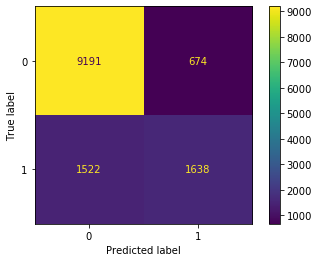

In [55]:
plot_confusion_matrix(xgb,X_test,y_test,values_format='.4g')
plt.show()

In [56]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.93      0.89      9865
           1       0.71      0.52      0.60      3160

    accuracy                           0.83     13025
   macro avg       0.78      0.73      0.75     13025
weighted avg       0.82      0.83      0.82     13025



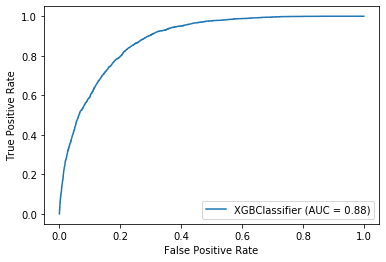

In [57]:
plot_roc_curve(xgb,X_test,y_test)
plt.show()

In [58]:
testdf

,age,fnlwgt,education-num,hours-per-week,marital-status_Married-AF-spouse,marital-status_Married-civ-spouse,marital-status_Married-spouse-absent,marital-status_Never-married,marital-status_Separated,marital-status_Widowed,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Male
32561,0.30137,0.044291,0.8,0.397959,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1


### Prediction

In [59]:
answer = xgb.predict(testdf)

In [60]:
answer

array([0])

The never-married subject earns $50K or less. 

In [61]:
#Load second test set for married/unmarried case
df5 = pd.read_csv("incometest2.csv")

In [62]:
df5

,age,fnlwgt,education-num,hours-per-week,marital-status_Married-AF-spouse,marital-status_Married-civ-spouse,marital-status_Married-spouse-absent,marital-status_Never-married,marital-status_Separated,marital-status_Widowed,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Male
0,0.30137,0.044291,0.8,0.397959,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,1


In [63]:
answer2 = xgb.predict(df5)

In [64]:
answer2

array([1])

The subject would earn more if he were married. 